# Task 2: Sentiment Analysis of Electronic Product Reviews 

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

## Data Preprocessing

In [33]:
# Load the training dataset 
train_df = pd.read_csv('/Users/kaylahoffman/Downloads/Starter_kit/data/train_data.csv')

# Load and preprocess the test dataset
test_df = pd.read_csv('/Users/kaylahoffman/Downloads/Starter_kit/data/test_data.csv', header=None)

# Assign column names
test_df.columns = ['Review Text'] + [f'Empty_{i}' for i in range(1, len(test_df.columns))]

# Remove the first row (which contains the header)
test_df = test_df.iloc[1:]

# Keep only the 'Review Text' column and drop the empty columns
test_df = test_df[['Review Text']]

# Reset the index
test_df = test_df.reset_index(drop=True)

# Handle NaN values
# Handle NaN values in both datasets
train_df['Review Text'].fillna('', inplace=True)
train_df['Ground_Truth'].fillna('', inplace=True)
test_df['Review Text'].fillna('', inplace=True)

print(test_df.head())

                                         Review Text
0  This is just what the tablet needs, it increas...
1  Works great with my Samsung Galaxy Tab3. Trans...
2  Arrived in manufacturers packaging so it looke...
3  Hold a lot of stuff for my phone! Used like 6G...
4  its a memory card and has the reputation you e...


### Split the training data and define X_test

In [34]:
# Assuming 'text' is the column containing the text data and 'label' is the target variable
X_train = train_df['Review Text']
y_train = train_df['Ground_Truth']

X_test = test_df['Review Text']

### Create and Train the model

In [35]:
# Create and train the model
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [37]:
# Make predictions on the test set
y_pred_probs = model.predict(X_test)

# Handle predictions based on shape
if len(y_pred.shape) == 1:
    # If predictions are already single values, use them directly
    y_pred_labels = y_pred
else:
    # If predictions are probabilities, get the class with highest probability
    y_pred_labels = np.argmax(y_pred, axis=1)

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")

Cross-validation scores: [0.55  0.65  0.65  0.675 0.675]
Mean CV score: 0.64


### Create a validation set from your training data

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
val_score = model.score(X_val, y_val)
print(f"Validation score: {val_score:.2f}")

Validation score: 0.68


### Save predictions to preds.txt file

In [40]:
# # Print the predicted labels
# print("Predicted labels:")
# for i, label in enumerate(y_pred_labels, 1):
#     print(f"Review {i}: {label}")

# Ensure exactly 20 predictions
y_pred_labels = y_pred_labels[:20]  # Truncate to first 20 predictions

# Save predictions to preds.txt (one prediction per line)
with open('preds.txt', 'w') as file:
    for label in y_pred_labels:
        file.write(f"{label}\n")

# Verify the number of lines
with open('preds.txt', 'r') as file:
    num_lines = sum(1 for line in file)
print(f"Number of predictions: {num_lines}")  # Should print 20

Number of predictions: 20


#### Accuracy on validation set

In [44]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy:.2f}")

Accuracy on validation set: 0.68


#### Classification Report

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         2
    Negative       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00         9
    Positive       0.68      1.00      0.81        27

    accuracy                           0.68        40
   macro avg       0.17      0.25      0.20        40
weighted avg       0.46      0.68      0.54        40



/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

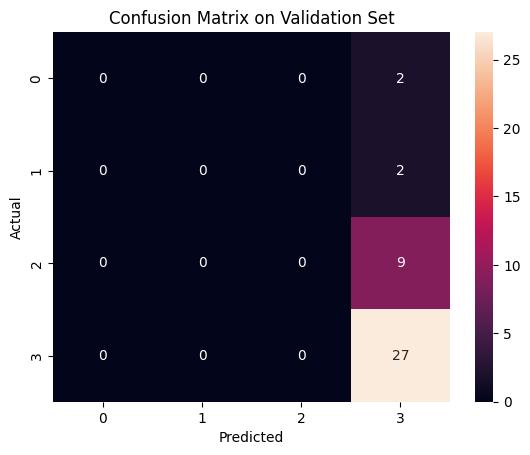

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Validation Set')
plt.show()

## Model 2: Second approach improvements

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

model2 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model2.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [59]:
# Make predictions on the test set
y_pred_probs = model2.predict(X_test)

# Handle predictions based on shape
if len(y_pred.shape) == 1:
    # If predictions are already single values, use them directly
    y_pred_labels = y_pred
else:
    # If predictions are probabilities, get the class with highest probability
    y_pred_labels = np.argmax(y_pred, axis=1)

In [60]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model2, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")

Cross-validation scores: [0.61904762 0.61904762 0.65       0.65       0.65      ]
Mean CV score: 0.64


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model2.fit(X_train, y_train)
val_score = model.score(X_val, y_val)
print(f"Validation score: {val_score:.2f}")

Validation score: 0.67


In [63]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (81,)
y_train shape: (81,)
X_val shape: (21,)
y_val shape: (21,)


In [64]:
y_pred = model.predict(X_val)
print("y_pred shape:", y_pred.shape)

y_pred shape: (21,)


In [67]:
# Fit the model
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_val)

print("y_val shape:", y_val.shape)
print("y_pred shape:", y_pred.shape)

val_score = model2.score(X_val, y_val)
print(f"Validation score: {val_score:.2f}")

y_val shape: (21,)
y_pred shape: (21,)
Validation score: 0.67


In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         5
    Negative       0.00      0.00      0.00         2
    Positive       0.67      1.00      0.80        14

    accuracy                           0.67        21
   macro avg       0.22      0.33      0.27        21
weighted avg       0.44      0.67      0.53        21



/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

## Model 3: Third and last approach to improve previous model

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'tfidfvectorizer__max_features': [1000, 5000, 10000],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'multinomialnb__alpha': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(model2, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_

Best parameters: {'multinomialnb__alpha': 0.1, 'tfidfvectorizer__max_features': 1000, 'tfidfvectorizer__ngram_range': (1, 2)}
Best cross-validation score: 0.6294117647058823


In [77]:
y_pred_best = best_model.predict(X_val)
accuracy_best = accuracy_score(y_val, y_pred_best)
print(f"Best model accuracy: {accuracy_best:.2f}")
print(classification_report(y_val, y_pred_best))

Best model accuracy: 0.67
              precision    recall  f1-score   support

                   0.00      0.00      0.00         5
    Negative       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00         0
    Positive       0.70      1.00      0.82        14

    accuracy                           0.67        21
   macro avg       0.17      0.25      0.21        21
weighted avg       0.47      0.67      0.55        21



/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model2, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")

Cross-validation scores: [0.64705882 0.625      0.625      0.625      0.625     ]
Mean CV score: 0.63
